Created by [SmirkyGraphs](http://smirkygraphs.github.io/). Code: [GitHub](https://github.com/SmirkyGraphs/Python-Notebooks). Source: [Kaggle](https://www.kaggle.com/c/home-credit-default-risk/data).
<hr>

## Introduction

### Index 

1) [Introduction](#Introduction)

- [Index](#Index)
- [Import Libraries](#import)
- [Creating Functions](#functions)

2) [Data Exploration](#data)

- [Application Train](#train)
    - [Basic Info](#basic1)
    - [Missing Values](#missing1)
    - [Visualizations](#viz1)
    
    
- [Bureau Balance](#bureau-bal)
    - [Basic Info](#basic2)
    - [Missing Values](#missing2)
    - [Visualizations](#viz2)
    
    
- [Bureau](#bureau)
    - [Basic Info](#basic3)
    - [Missing Values](#missing3)
    - [Visualizations](#viz3)
    
    
- [Credit Card Balance](#ccbal)
    - [Basic Info](#basic4)
    - [Missing Values](#missing4)
    - [Visualizations](#viz4)
    
    
- [Installments Payments](#install)
    - [Basic Info](#basic5)
    - [Missing Values](#missing5)
    - [Visualizations](#viz5)
    
    
- [POS CASH Balance](#pos)
    - [Basic Info](#basic6)
    - [Missing Values](#missing6)
    - [Visualizations](#viz6)
    
    
- [Previous Application](#prev)
    - [Basic Info](#basic7)
    - [Missing Values](#missing7)
    - [Visualizations](#viz7)
    
3) [Predictions](#data)

### Importing Libraries

In [1]:
# For Data
import pandas as pd
import numpy as np

# For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

<section id="functions"></section>

### Creating Functions

In [2]:
def missingdata(frame):
    frames = []
    
    count = frame.isnull().sum()
    frames.append(count)
    
    percent = frame.isnull().sum()/frame.shape[0]
    frames.append(percent)
    
    output = pd.concat([count, percent], axis=1, keys=['Count', 'Percent'])
    output = output[output['Percent'] > 0.01].sort_values('Percent', ascending=False)
    
    if output.empty == True:
        print("No missing data > 1%")
    else:
        return output

In [3]:
def graph_objects(frame, hue=None):
    
    if hue is not None:
        hue = hue
        
    df = frame.dtypes
    df.index.name = 'columns'
    df = pd.DataFrame(df, columns=['dtype'])
    df = df.reset_index()
    df = df[df['dtype'] == 'object']
    list_objects = df['columns'].tolist()
    
    for obj in list_objects:
        plt.figure(figsize=(11,5))
        plot = sns.countplot(obj, data=frame, hue=hue)
        plt.xticks(rotation=90)

<section id="data"></section>

<hr>

## Data Exploration

<section id="train"></section>

### Application Train

This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).


Static data for all applications. One row represents one loan in our data sample.

<section id="basic1"></section>

### Basic Info

In [4]:
application_train = pd.read_csv('./input/application_train.csv')

In [5]:
application_train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

In [6]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<section id=missing1></section>

### Missing Values

In [7]:
missingdata(application_train)

,Count,Percent
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_AVG,213514,0.694330
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
NONLIVINGAPARTMENTS_MODE,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_MODE,210199,0.683550
LIVINGAPARTMENTS_MEDI,210199,0.683550
LIVINGAPARTMENTS_AVG,210199,0.683550


<section id=viz1></section>

### Visualizations

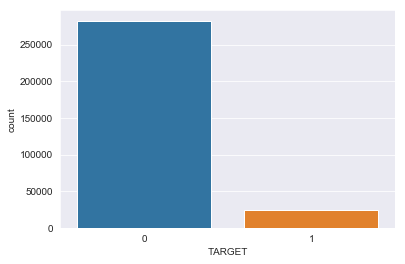

In [8]:
sns.countplot('TARGET', data=application_train)

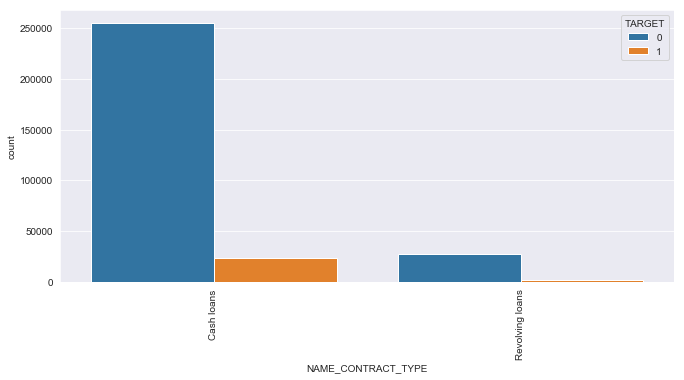

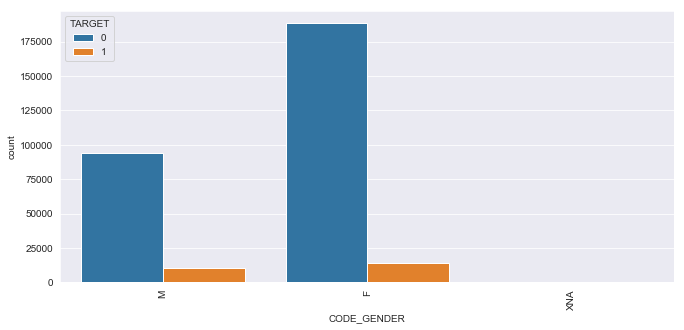

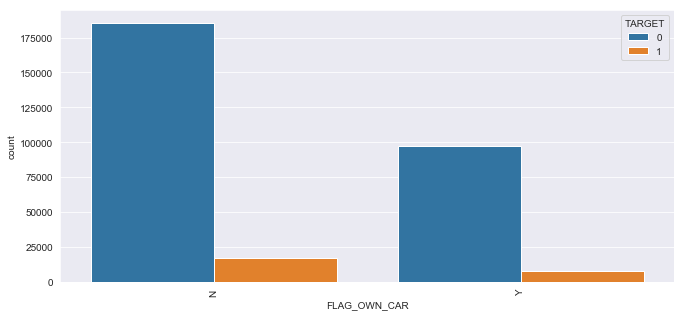

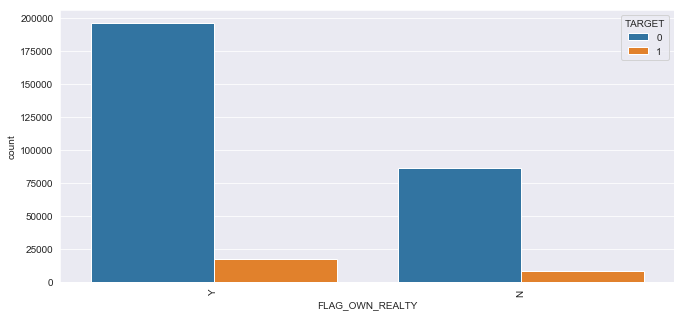

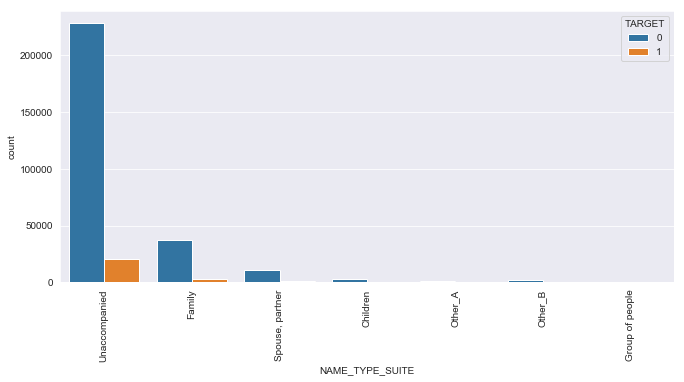

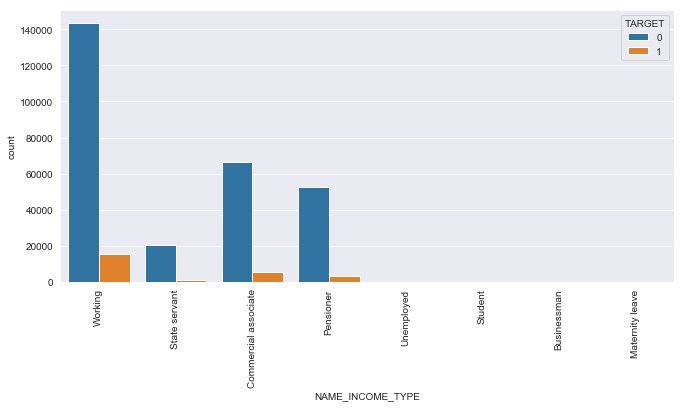

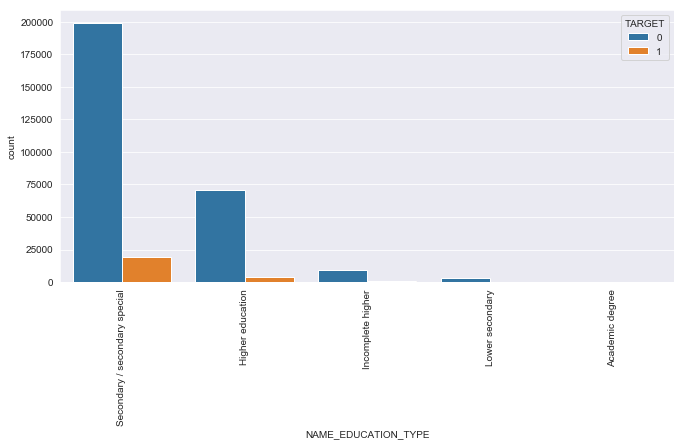

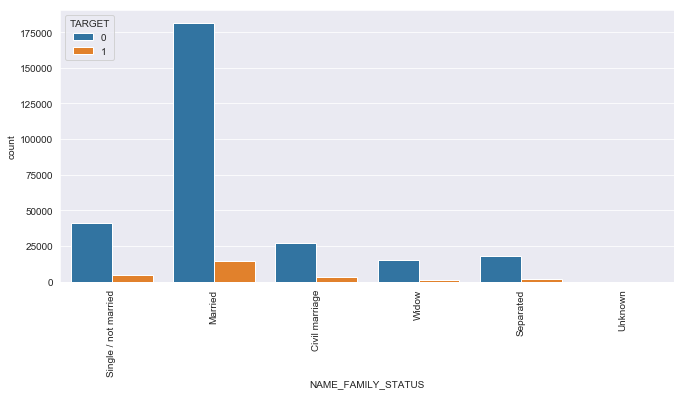

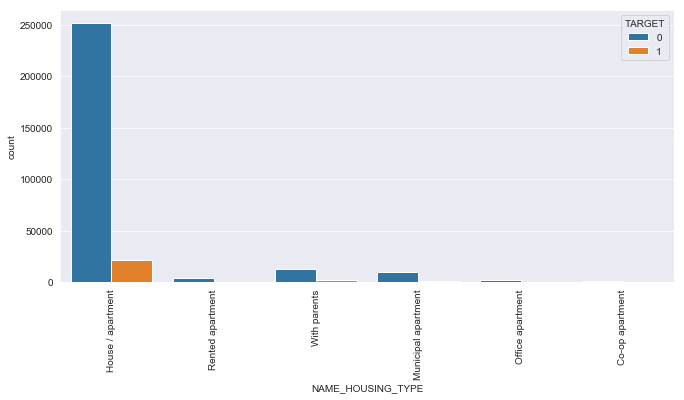

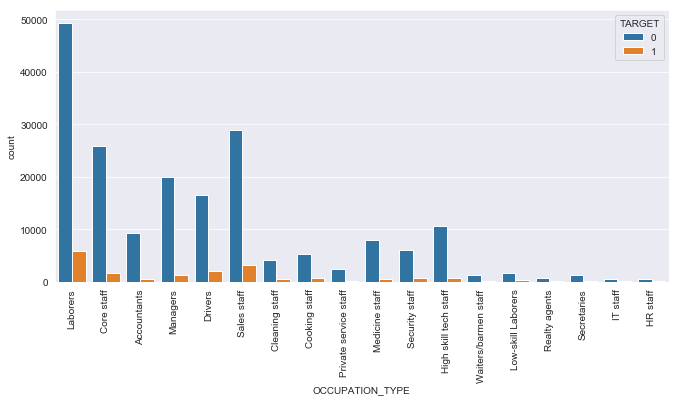

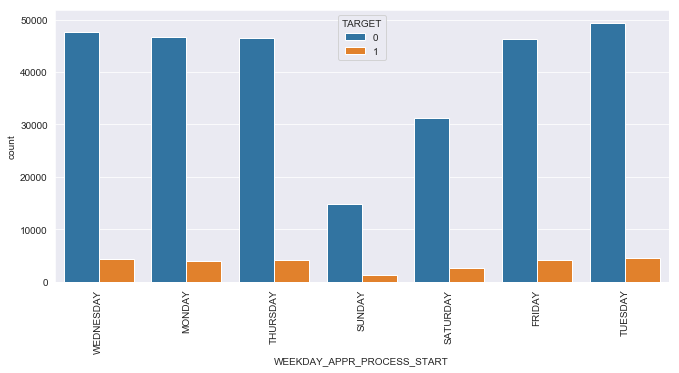

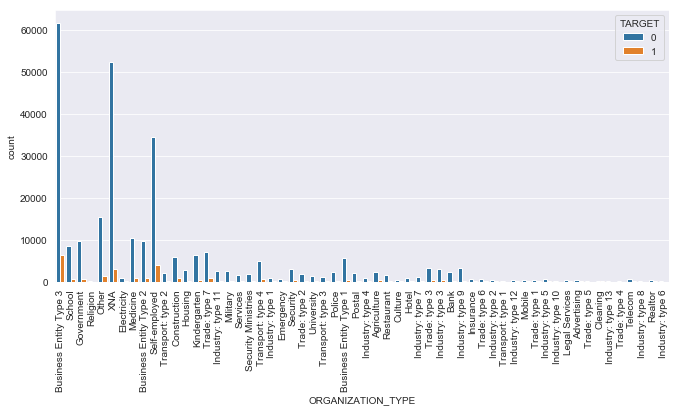

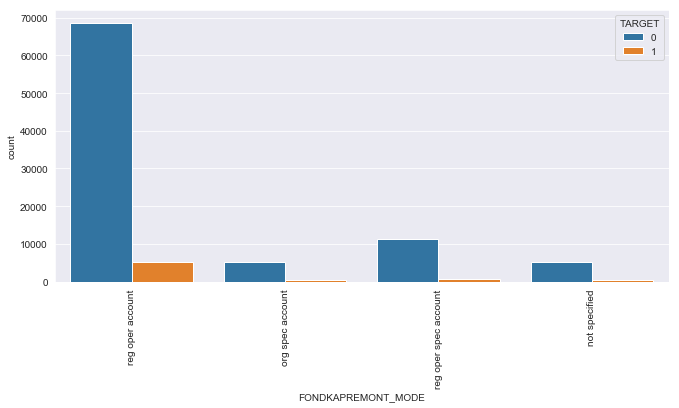

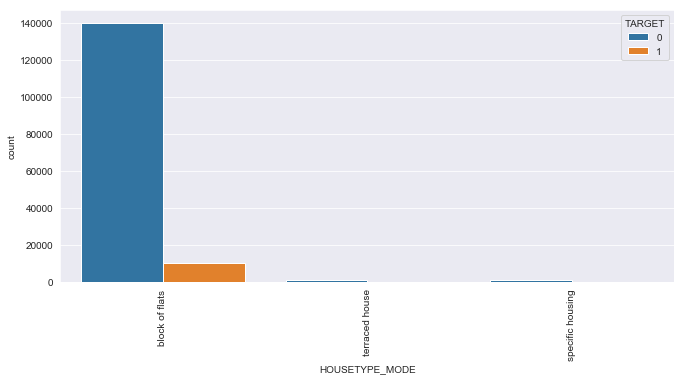

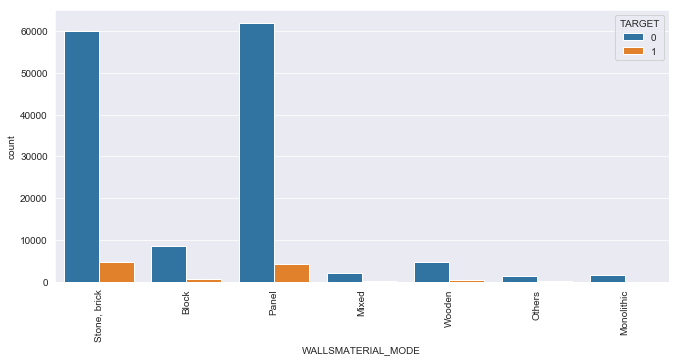

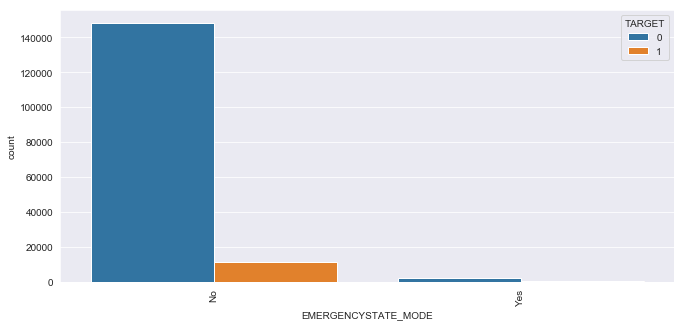

In [9]:
graph_objects(application_train, hue='TARGET')

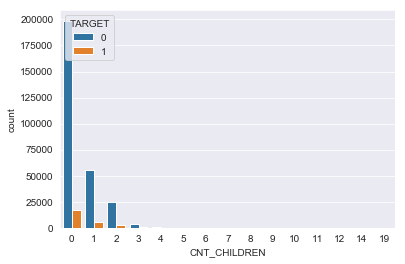

In [10]:
sns.countplot('CNT_CHILDREN', data=application_train, hue='TARGET')

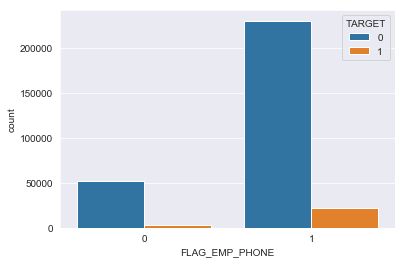

In [11]:
sns.countplot('FLAG_EMP_PHONE', data=application_train, hue='TARGET')

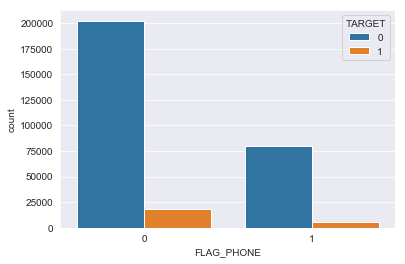

In [12]:
sns.countplot('FLAG_PHONE', data=application_train, hue='TARGET')

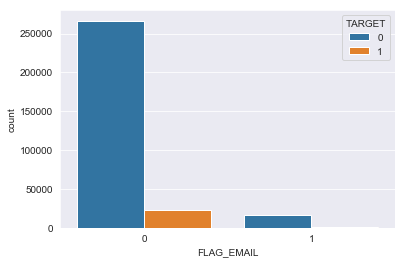

In [13]:
sns.countplot('FLAG_EMAIL', data=application_train, hue='TARGET')

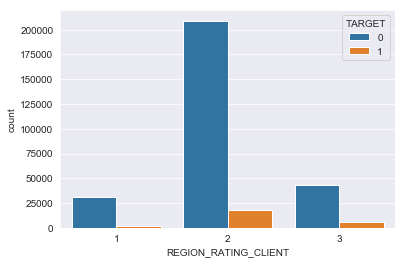

In [14]:
sns.countplot('REGION_RATING_CLIENT', data=application_train, hue='TARGET')

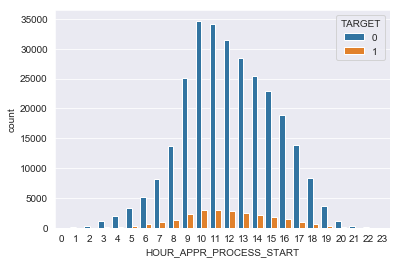

In [15]:
sns.countplot('HOUR_APPR_PROCESS_START', data=application_train, hue='TARGET')

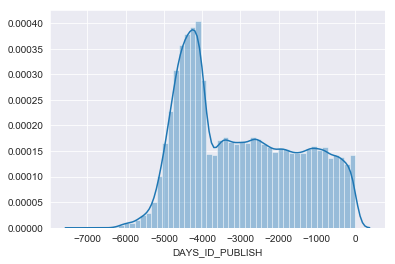

In [16]:
sns.distplot(application_train["DAYS_ID_PUBLISH"])

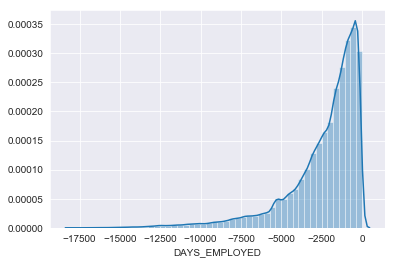

In [17]:
days_employed = application_train[application_train['DAYS_EMPLOYED'] < 365243]
sns.distplot(days_employed["DAYS_EMPLOYED"])

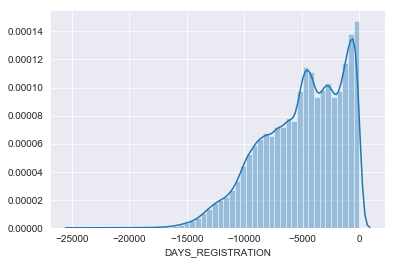

In [18]:
sns.distplot(application_train["DAYS_REGISTRATION"])

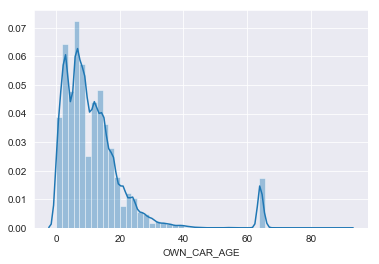

In [19]:
sns.distplot(application_train.OWN_CAR_AGE.dropna())

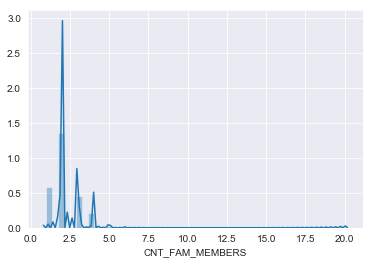

In [20]:
sns.distplot(application_train.CNT_FAM_MEMBERS.dropna())

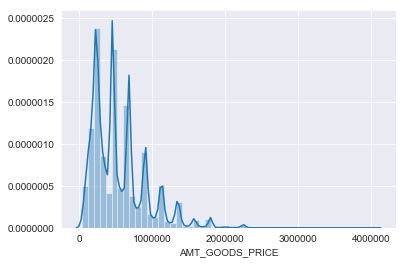

In [21]:
sns.distplot(application_train.AMT_GOODS_PRICE.dropna())

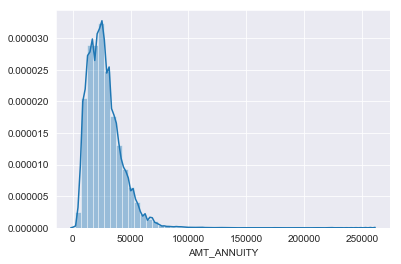

In [22]:
sns.distplot(application_train.AMT_ANNUITY.dropna())

<section id="bureau-bal"></section>

<hr>

## Bureau Balance

Monthly balances of previous credits in Credit Bureau.

This table has one row for each month of history of every previous credit reported to Credit Bureau
i.e the table has 

(#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

<section id="basic2"></section>

### Basic Info

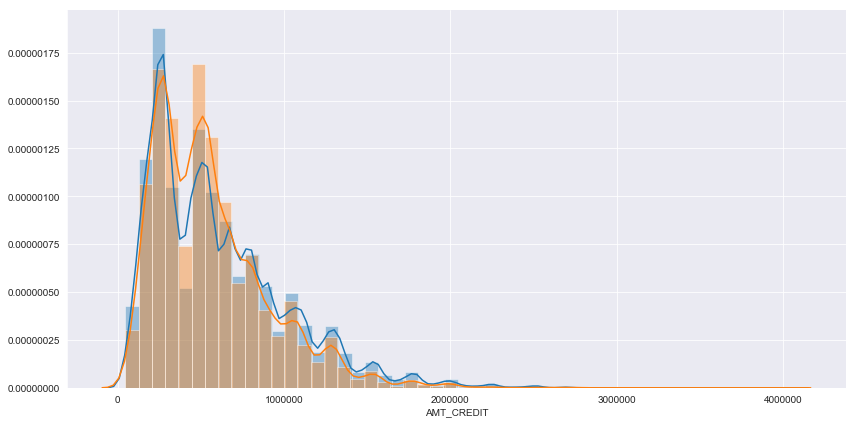

In [23]:
credit = sns.FacetGrid(application_train, hue="TARGET", height=6, aspect=2)
credit = credit.map(sns.distplot, "AMT_CREDIT")

Monthly balances of previous credits in Credit Bureau.

This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has 

(#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

In [24]:
bureau_balance = pd.read_csv('./input/bureau_balance.csv')

In [25]:
bureau_balance.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
SK_ID_BUREAU      27299925 non-null int64
MONTHS_BALANCE    27299925 non-null int64
STATUS            27299925 non-null object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [26]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


<section id=missing2></section>

### Missing Values

In [27]:
missingdata(bureau_balance)

No missing data > 1%


<section id=viz2></section>

### Visualizations

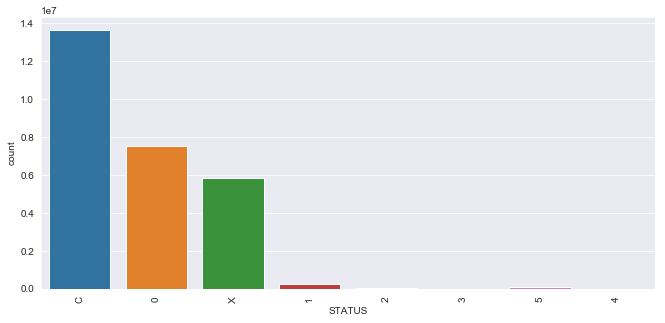

In [28]:
graph_objects(bureau_balance)

<section id=bureau></section>
<hr>

## Bureau

All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).

For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

<section id="basic3"></section>

### Basic Info

In [29]:
bureau = pd.read_csv('./input/bureau.csv')

In [30]:
bureau.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
SK_ID_CURR                1716428 non-null int64
SK_ID_BUREAU              1716428 non-null int64
CREDIT_ACTIVE             1716428 non-null object
CREDIT_CURRENCY           1716428 non-null object
DAYS_CREDIT               1716428 non-null int64
CREDIT_DAY_OVERDUE        1716428 non-null int64
DAYS_CREDIT_ENDDATE       1610875 non-null float64
DAYS_ENDDATE_FACT         1082775 non-null float64
AMT_CREDIT_MAX_OVERDUE    591940 non-null float64
CNT_CREDIT_PROLONG        1716428 non-null int64
AMT_CREDIT_SUM            1716415 non-null float64
AMT_CREDIT_SUM_DEBT       1458759 non-null float64
AMT_CREDIT_SUM_LIMIT      1124648 non-null float64
AMT_CREDIT_SUM_OVERDUE    1716428 non-null float64
CREDIT_TYPE               1716428 non-null object
DAYS_CREDIT_UPDATE        1716428 non-null int64
AMT_ANNUITY               489637 non-null float64
dtypes: float64(8), int64(6), object(

In [31]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


<section id=missing3></section>

### Missing Values

In [32]:
missingdata(bureau)

,Count,Percent
AMT_ANNUITY,1226791,0.714735
AMT_CREDIT_MAX_OVERDUE,1124488,0.655133
DAYS_ENDDATE_FACT,633653,0.369170
AMT_CREDIT_SUM_LIMIT,591780,0.344774
AMT_CREDIT_SUM_DEBT,257669,0.150119
DAYS_CREDIT_ENDDATE,105553,0.061496


<section id=viz3></section>

### Visualizations

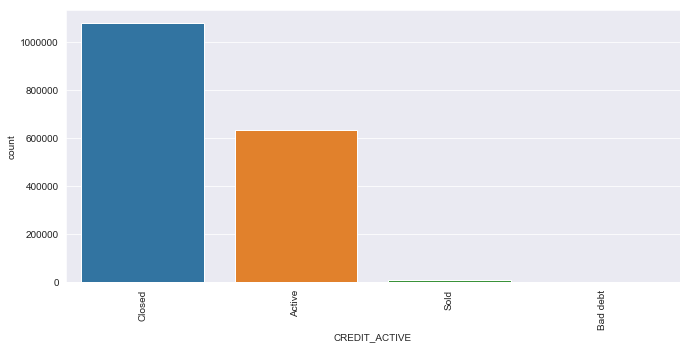

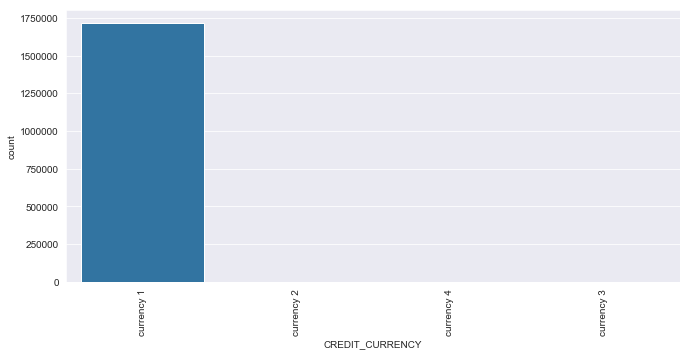

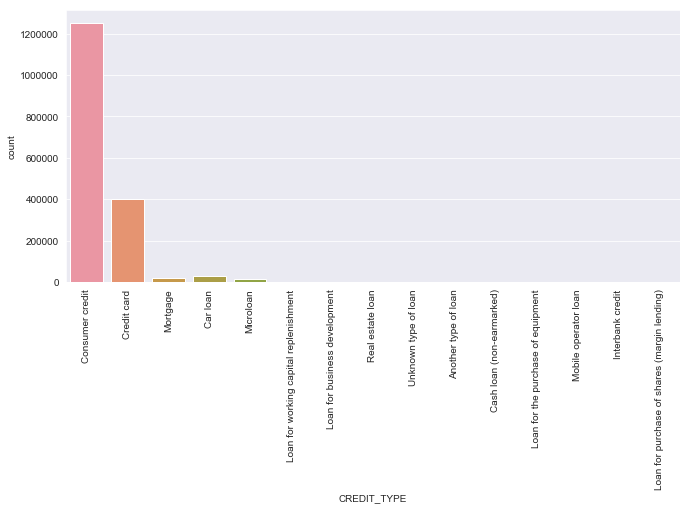

In [33]:
graph_objects(bureau)

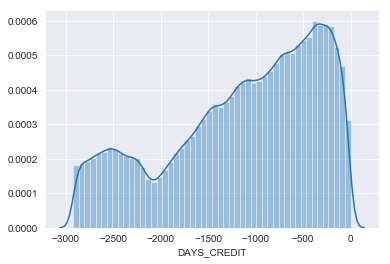

In [34]:
sns.distplot(bureau.DAYS_CREDIT.dropna())

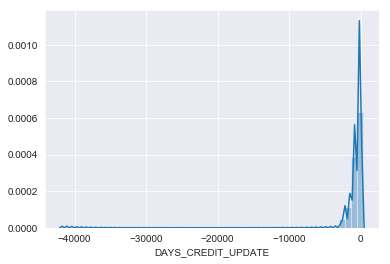

In [35]:
sns.distplot(bureau.DAYS_CREDIT_UPDATE.dropna())

<section id=ccbal></section>
<hr>

## Credit Card Balance

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.


This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample

(#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

<section id="basic4"></section>

### Basic Info

In [36]:
credit_card_balance = pd.read_csv('./input/credit_card_balance.csv')

In [37]:
credit_card_balance.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
SK_ID_PREV                    3840312 non-null int64
SK_ID_CURR                    3840312 non-null int64
MONTHS_BALANCE                3840312 non-null int64
AMT_BALANCE                   3840312 non-null float64
AMT_CREDIT_LIMIT_ACTUAL       3840312 non-null int64
AMT_DRAWINGS_ATM_CURRENT      3090496 non-null float64
AMT_DRAWINGS_CURRENT          3840312 non-null float64
AMT_DRAWINGS_OTHER_CURRENT    3090496 non-null float64
AMT_DRAWINGS_POS_CURRENT      3090496 non-null float64
AMT_INST_MIN_REGULARITY       3535076 non-null float64
AMT_PAYMENT_CURRENT           3072324 non-null float64
AMT_PAYMENT_TOTAL_CURRENT     3840312 non-null float64
AMT_RECEIVABLE_PRINCIPAL      3840312 non-null float64
AMT_RECIVABLE                 3840312 non-null float64
AMT_TOTAL_RECEIVABLE          3840312 non-null float64
CNT_DRAWINGS_ATM_CURRENT      3090496 non-null float64
CNT_DRAWINGS_CU

In [38]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


<section id=missing4></section>

### Missing Values

In [39]:
missingdata(credit_card_balance)

,Count,Percent
AMT_PAYMENT_CURRENT,767988,0.199981
AMT_DRAWINGS_ATM_CURRENT,749816,0.195249
AMT_DRAWINGS_OTHER_CURRENT,749816,0.195249
AMT_DRAWINGS_POS_CURRENT,749816,0.195249
CNT_DRAWINGS_ATM_CURRENT,749816,0.195249
CNT_DRAWINGS_OTHER_CURRENT,749816,0.195249
CNT_DRAWINGS_POS_CURRENT,749816,0.195249
AMT_INST_MIN_REGULARITY,305236,0.079482
CNT_INSTALMENT_MATURE_CUM,305236,0.079482


<section id=viz4></section>

### Visualizations

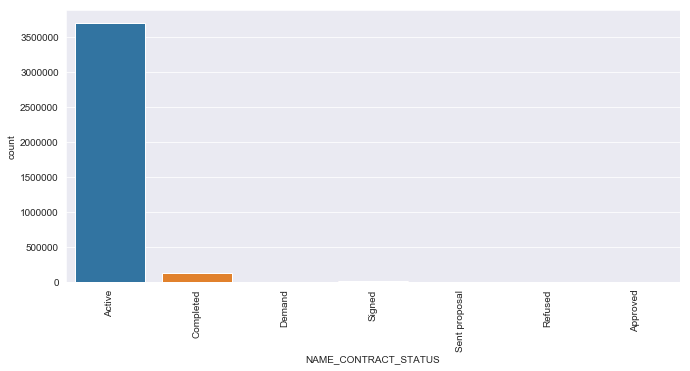

In [40]:
graph_objects(credit_card_balance)

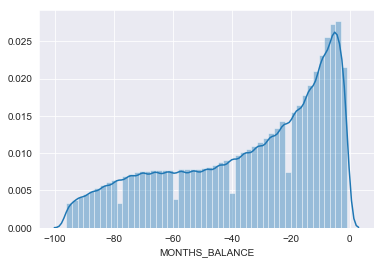

In [41]:
sns.distplot(credit_card_balance.MONTHS_BALANCE.dropna())

<section id=install></section>
<hr>

## Installments Payments

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.

There is a) one row for every payment that was made plus b) one row each for missed payment.

One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

<section id=basic5></section>

### Basic Info

In [42]:
installments_payments = pd.read_csv('./input/installments_payments.csv')

In [43]:
installments_payments.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
SK_ID_PREV                13605401 non-null int64
SK_ID_CURR                13605401 non-null int64
NUM_INSTALMENT_VERSION    13605401 non-null float64
NUM_INSTALMENT_NUMBER     13605401 non-null int64
DAYS_INSTALMENT           13605401 non-null float64
DAYS_ENTRY_PAYMENT        13602496 non-null float64
AMT_INSTALMENT            13605401 non-null float64
AMT_PAYMENT               13602496 non-null float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [44]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


<section id=missing5></section>

### Missing Values

In [45]:
missingdata(installments_payments)

No missing data > 1%


<section id=viz5></section>

### Visualizations

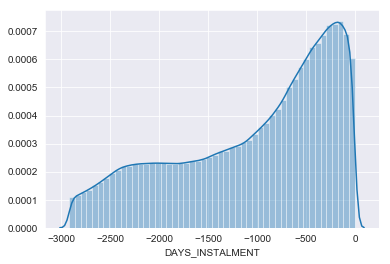

In [46]:
sns.distplot(installments_payments.DAYS_INSTALMENT.dropna())

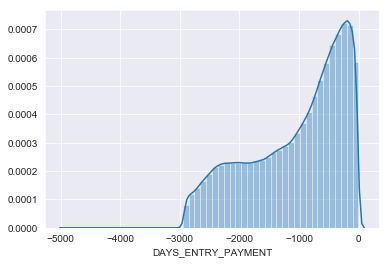

In [47]:
sns.distplot(installments_payments.DAYS_ENTRY_PAYMENT.dropna())

<section id=pos></section>
<hr>

## POS CASH Balance

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.

This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample

(#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

<section id=basic6></section>

### Basic Info

In [48]:
POS_CASH_balance = pd.read_csv('./input/POS_CASH_balance.csv')

In [49]:
POS_CASH_balance.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
SK_ID_PREV               10001358 non-null int64
SK_ID_CURR               10001358 non-null int64
MONTHS_BALANCE           10001358 non-null int64
CNT_INSTALMENT           9975287 non-null float64
CNT_INSTALMENT_FUTURE    9975271 non-null float64
NAME_CONTRACT_STATUS     10001358 non-null object
SK_DPD                   10001358 non-null int64
SK_DPD_DEF               10001358 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [50]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


<section id=missing6></section>

### Missing Values

In [51]:
missingdata(POS_CASH_balance)

No missing data > 1%


<section id=viz6></section>

### Visualizations

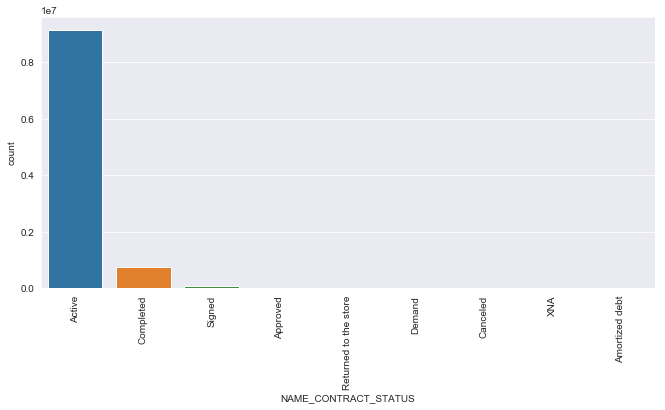

In [52]:
graph_objects(POS_CASH_balance)

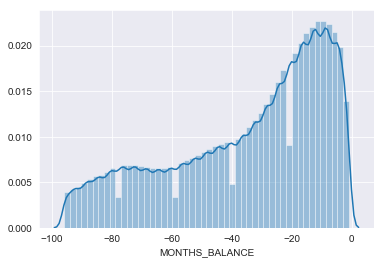

In [53]:
sns.distplot(POS_CASH_balance.MONTHS_BALANCE)

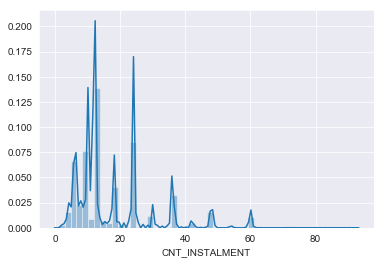

In [54]:
sns.distplot(POS_CASH_balance.CNT_INSTALMENT.dropna())

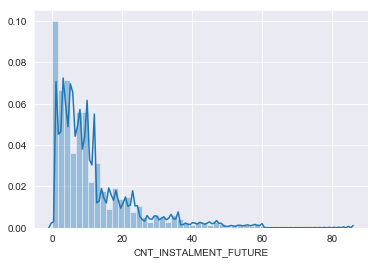

In [55]:
sns.distplot(POS_CASH_balance.CNT_INSTALMENT_FUTURE.dropna())

<section id=prev></section>
<hr>

## Previous Application

All previous applications for Home Credit loans of clients who have loans in our sample.

There is one row for each previous application related to loans in our data sample.

<section id=basic7></section>

### Basic Info

In [56]:
previous_application = pd.read_csv('./input/previous_application.csv')

In [57]:
previous_application.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [58]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


<section id=missing7></section>

### Missing Values

In [59]:
missingdata(previous_application)

,Count,Percent
RATE_INTEREST_PRIMARY,1664263,0.996437
RATE_INTEREST_PRIVILEGED,1664263,0.996437
AMT_DOWN_PAYMENT,895844,0.536365
RATE_DOWN_PAYMENT,895844,0.536365
NAME_TYPE_SUITE,820405,0.491198
DAYS_FIRST_DRAWING,673065,0.402981
DAYS_FIRST_DUE,673065,0.402981
DAYS_LAST_DUE_1ST_VERSION,673065,0.402981
DAYS_LAST_DUE,673065,0.402981
DAYS_TERMINATION,673065,0.402981


<section id=viz7></section>

### Visualizations

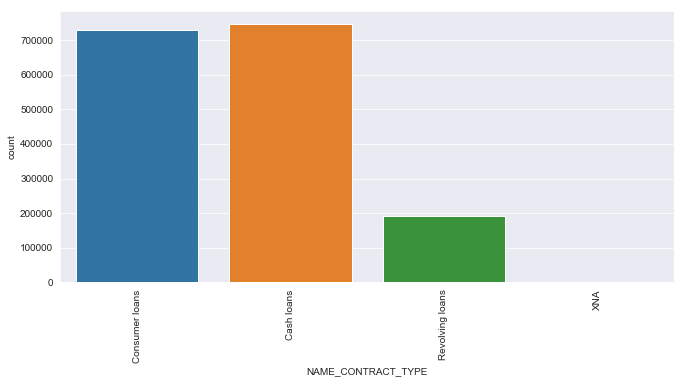

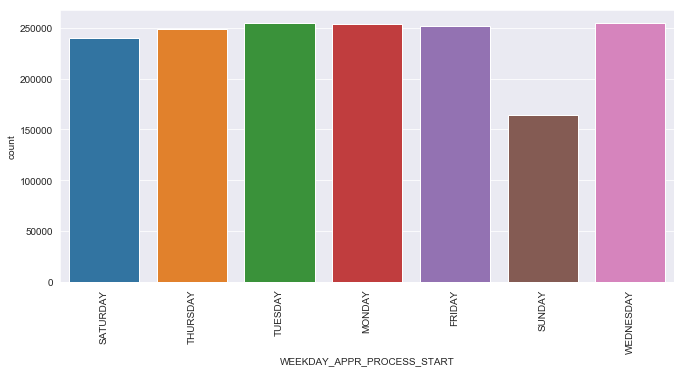

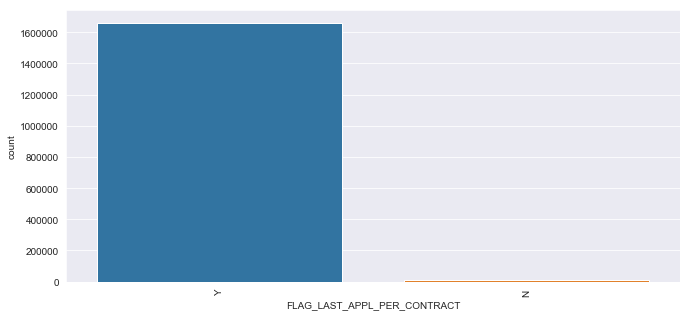

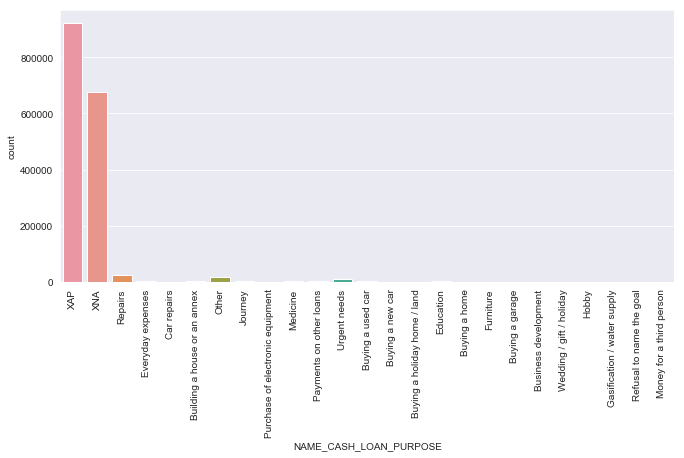

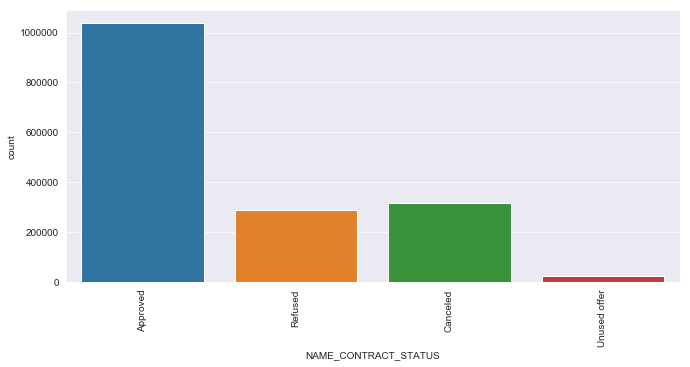

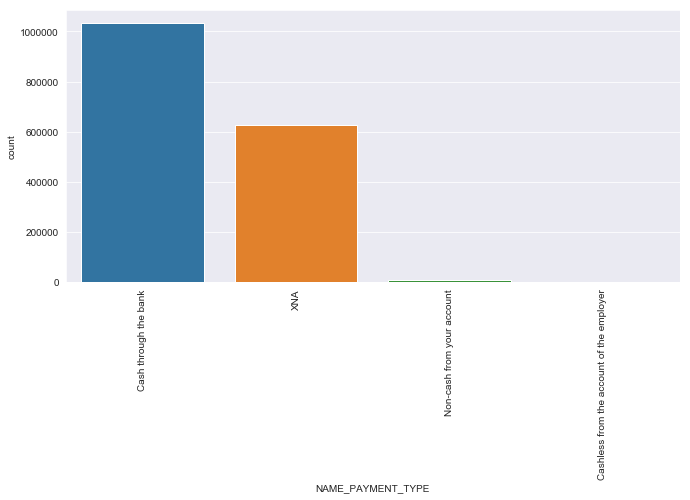

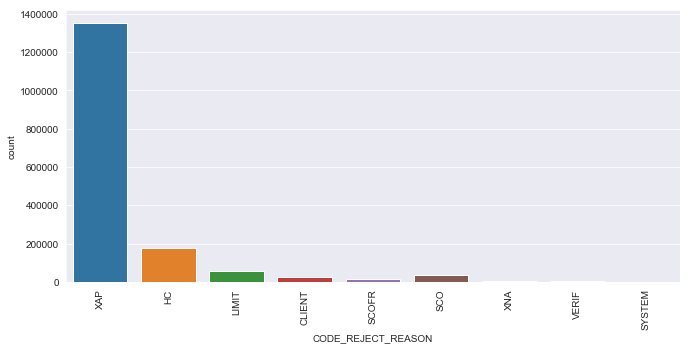

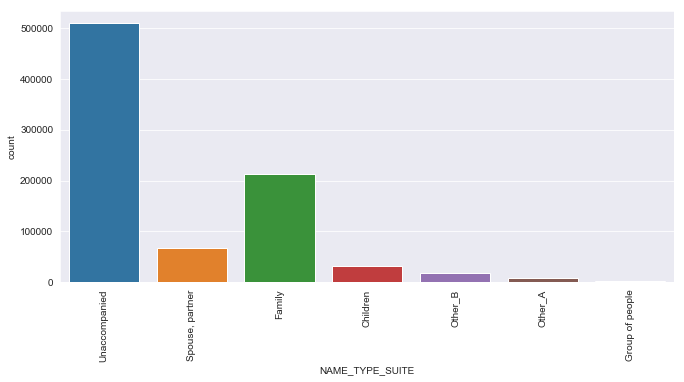

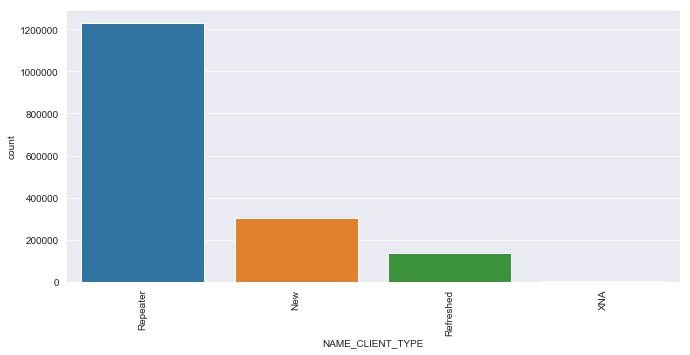

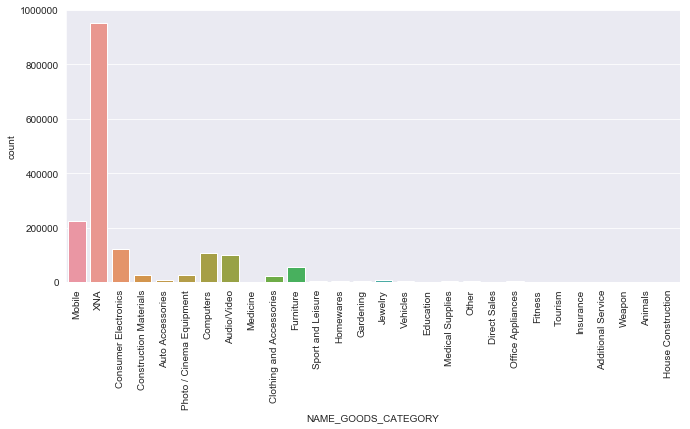

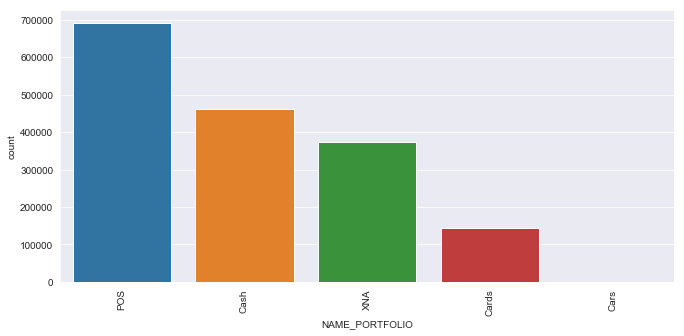

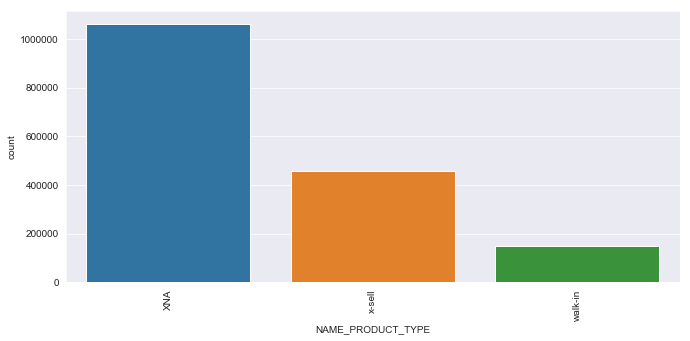

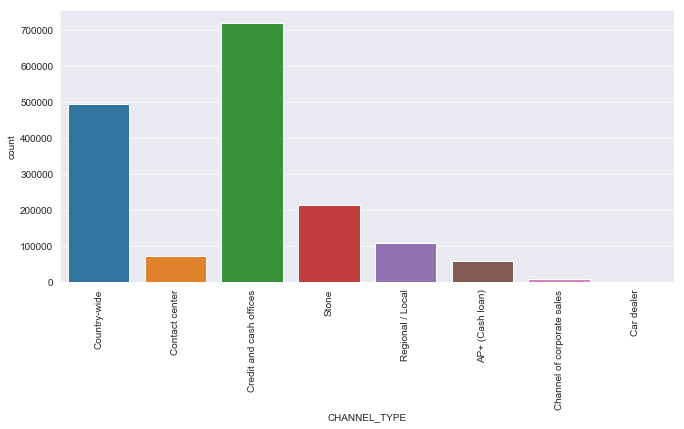

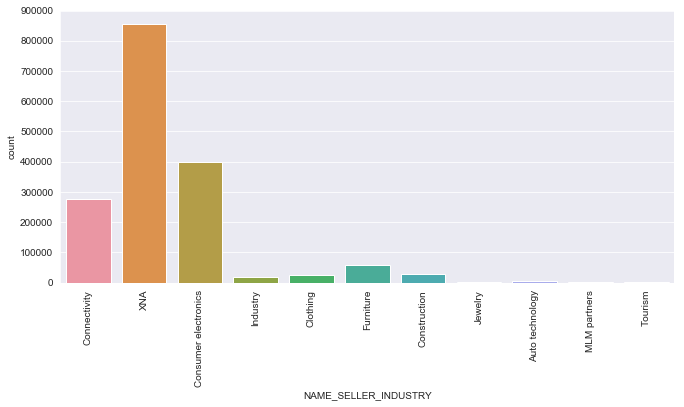

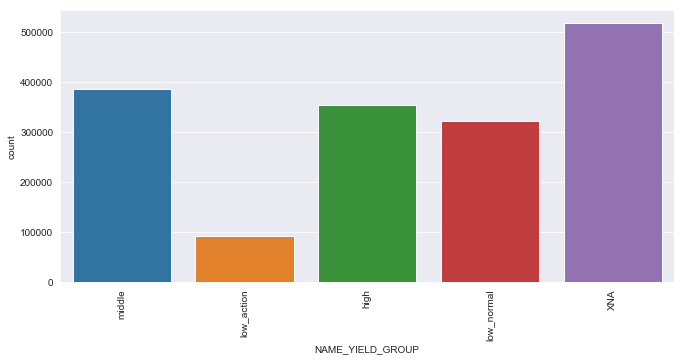

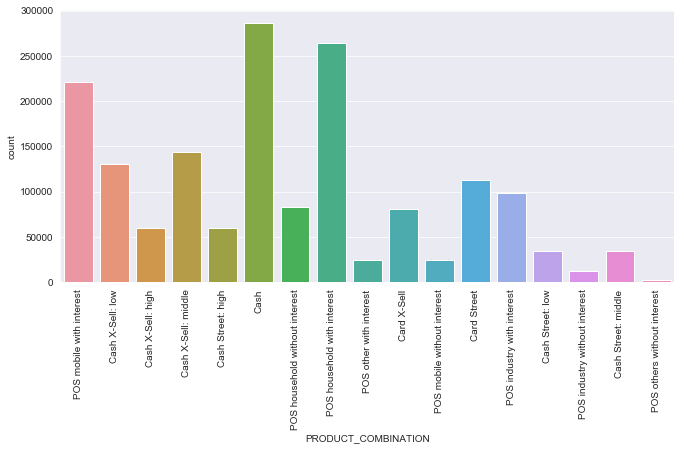

In [60]:
graph_objects(previous_application)

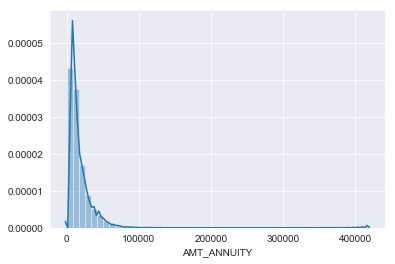

In [61]:
sns.distplot(previous_application.AMT_ANNUITY.dropna())

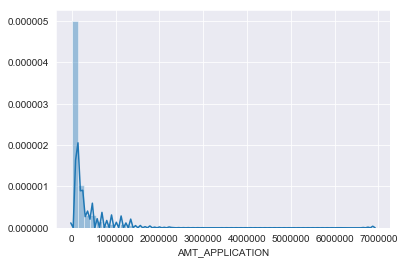

In [62]:
sns.distplot(previous_application.AMT_APPLICATION.dropna())